In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple
import pandas as pd
plt.rcParams['figure.figsize'] = [10, 10]
import seaborn
import sklearn

In [2]:
from model_mining.CreateDataSets import *
from model_mining.VisualizeDatasets import *

In [3]:
#filename_prefix="C:\\Users\\FelixStamm\\Desktop\\mapraktikum\\pics\\artifical_dataset"

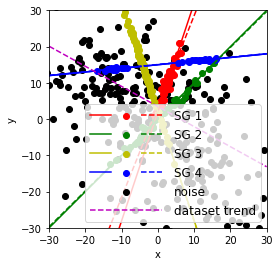

could not safe file


In [4]:
points=[]
dx=30
dy=30
trend_points,tpl_k=plotLineAndGaussianAndFit(300,-1,-2,sigma1=20,sigma2=10,x_center=0,color='k',plot_fit=False,plot_line=False)
points_r,tpl_r=plotLineAndGaussianAndFit(50,3,2,sigma1=5,sigma2=0.5,x_center=3,color='r')
points_g,tpl_g=plotLineAndGaussianAndFit(50,1,0, sigma1=10,sigma2=0.5,x_center=0,color='g')
points_b1,_=plotLineAndGaussianAndFit(20,0.1,15,sigma1=2,sigma2=0.2,x_center=12,color='b',plot_fit=False)
points_b2,tpl_b=plotLineAndGaussianAndFit(20,0.1,15,sigma1=2,sigma2=0.2,x_center=-12,color='b',plot_fit=False)
ax=plotfit(np.concatenate([points_b1,points_b2]),'b',dx)
tpl_b=tuple([*tpl_b,ax[0]])
points_y,tpl_y=plotLineAndGaussianAndFit(100,-3,2,sigma1=10,sigma2=0.2,x_center=-4,color='y')
points_np=np.concatenate([trend_points,points_r,points_g,points_b1,points_b2,points_y])
ax=plotfit(points_np,'m',dx)
plt.xlim(-dx, dx)
plt.ylim(-dy, dy)
plt.xlabel("x")
plt.ylabel("y")
plt.legend([tpl_r,tpl_g,tpl_y,tpl_b,tpl_k,ax[0]], ['SG 1',"SG 2","SG 3","SG 4","noise","dataset trend"], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)},handlelength=6,handletextpad=1,fontsize="large")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
try:
    plt.savefig(filename_prefix+"1.pdf")
except:
    print("could not safe file")

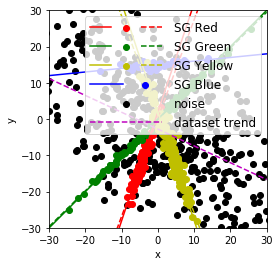

could not safe file


In [5]:
points=[]
trend_points,tpl_k=plotLineAndGaussianAndFit(500,-1,-2,sigma1=20,sigma2=10,x_center=0,color='k',plot_fit=False,plot_line=False)
points_r,tpl_r=plotLineAndGaussianAndFit(100,3,2,sigma1=5,sigma2=0.5,x_center=-5,color='r')
points_g,tpl_g=plotLineAndGaussianAndFit(100,1,0, sigma1=15,sigma2=0.5,x_center=0,color='g')
points_b,tpl_b=plotLineAndGaussianAndFit(40,0.1,15,sigma1=5,sigma2=0.7,x_center=0,color='b',plot_fit=False)
points_y,tpl_y=plotLineAndGaussianAndFit(150,-3,2,sigma1=10,sigma2=1,x_center=3,color='y')
points_np=np.concatenate([trend_points,points_r,points_g,points_b1,points_b2,points_y])
ax=plotfit(points_np,'m',dx)
plt.xlim(-dx, dx)
plt.ylim(-dy, dy)
plt.xlabel("x")
plt.ylabel("y")
plt.legend([tpl_r,tpl_g,tpl_y,tpl_b,tpl_k,ax[0]], ['SG Red',"SG Green","SG Yellow","SG Blue","noise","dataset trend"], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)},handlelength=6,handletextpad=1,fontsize="large")
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
try:
    plt.savefig(filename_prefix+"2.pdf")
except:
    print("could not safe file")

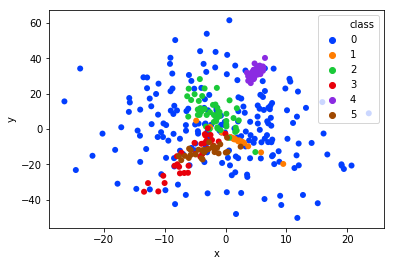

In [6]:
limits=np.array([[-5,5],[-10,10],[3,10],[0.2,3],[-5,5]])
params=generateParametersForLines2(7,limits)
params=np.vstack([[0,0,10,20,0],params])
#print(params)
ns=[200,20,50,30,40,30]
df=generateDataFrameForLinesByInjection(ns,params)
visualizeArtificialDataFrame(df)

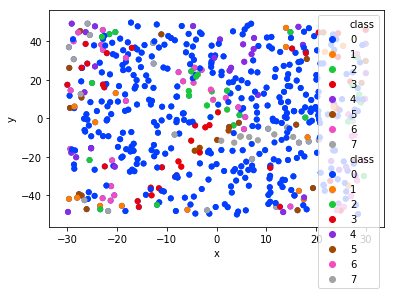

In [7]:
weights=np.array([5,1,1,1,1,1,1,1])
weights=weights/np.sum(weights)
n=np.sum(ns)+200
points=np.array([np.random.uniform(-30,30,n),np.random.uniform(-50,50,n)]).T
del n
d=generateDataFrameForLinesByAssignment(np.sum(ns)+200,params,weights,background=points)
df=pd.DataFrame.from_dict(d)
visualizeArtificialDataFrame(df)

d=generateDataFrameForLinesByAssignment(np.sum(ns)+200,params,weights,background=points,strategy='distribution',epsilon=1E-6)
df=pd.DataFrame.from_dict(d)
visualizeArtificialDataFrame(df)

In [8]:
from pysubgroup import ReReMi
from pysubgroup.Redescription import SelectorGenerator

In [9]:

limits=np.array([[-5,5],[-10,10],[3,10],[0.2,3],[-5,5]])
params=generateParametersForLines2(7,limits)
params=np.vstack([[0,0,10,20,0],params])
#print(params)
ns=[200,20,50,30,40,30]
df=generateDataFrameForLinesByInjection(ns,params)
df=addNoiseParams(df,np.random.uniform(0.2,0.8,10))
columns=[x for x in df.columns if (x not in ['x','y'])]
df["class"]=np.array(df["class"],dtype=str)
Literals=SelectorGenerator().convertLiteralStringsToLiterals(df,columns)

There were 16 selectors obtained


In [10]:


fits=doFitsForLiterals(df,Literals)

In [11]:
def displayLiterals(Literals):
    for L in Literals:
        print(L.name)
        for sel in L.selectors:
            print(sel)
        print()

        

    
def genAndDoFits(ns,params):
    f = plt.figure()
    df=generateDataFrameForLinesByInjection(ns,params)
    df=addNoiseParams(df,np.random.uniform(0.2,0.8,10))

    df,fits=doFitsForDataFrame(df)

    return df,fits

There were 13 selectors obtained
There were 13 selectors obtained


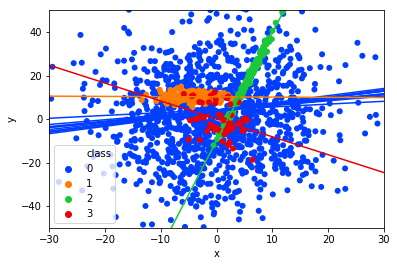

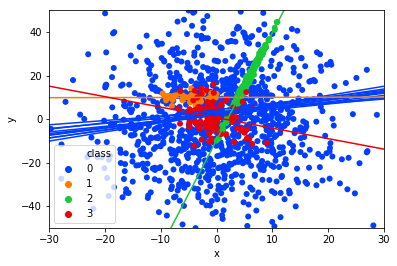

In [12]:
df1,df2=getTwoDataFrames(3)
visualize_fits(*doFitsForDataFrame(df1))
plt.figure()
visualize_fits(*doFitsForDataFrame(df2))

In [13]:
from model_mining.QualityFunctions import *

In [14]:
seaborn.color_palette("bright", 10)[0]

(0.00784313725490196, 0.24313725490196078, 1.0)

In [15]:
l_cook=[]

In [16]:
limits=np.array([[-5,5],[-10,10],[3,10],[0.2,3],[-5,5]])
params=generateParametersForLines2(3,limits)

params=np.vstack([[0,0,10,20,0],params])

#print(params)
ns_limits=np.hstack([[1000],np.random.randint(30,200,len(params))] )

ns=genNsFromAverage(ns_limits)

df,other=genAndDoFits(ns,params)

deg=1


inds=df['class']==0
the_df=df[inds]
beta_All=np.polyfit(the_df['x'],the_df['y'],deg=deg)
XTX,s_2=getXTXforFit(the_df['x'],the_df['y'],beta_All)
for c in range(1,len(params)):
    inds=df['class']==c
    the_df=df[inds]
    dist=CooksDistance(the_df['x'],the_df['y'],beta_All,deg,XTX,s_2)
    l_cook.append((len(df), len(the_df),dist))
    print("{}  {}".format(c,dist))
#visualize_fits(df,other)

There were 13 selectors obtained
1  30.304145615837353
2  108.39214056259819
3  971.2098202310522


<Figure size 432x288 with 0 Axes>

In [17]:
len(l_cook)

3

In [18]:
arr=np.array(l_cook)
inds=arr[:,2]<10000
arr=arr[inds,:]

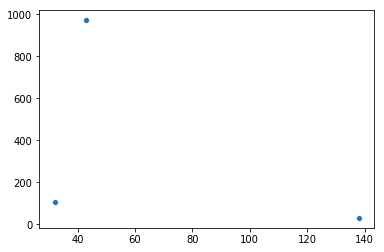

In [19]:
seaborn.scatterplot(arr[:,1],arr[:,2])